**Train SVM Model**

1. import Python packages and training data

In [25]:
# adding required libraries
import pandas as pd
import numpy as np

In [26]:
# Load the data from csv
x_data_org =pd.read_csv('../data/interim/x_data_org.csv')
y_data_org =pd.read_csv('../data/interim/y_data_org.csv')
x_data_eda =pd.read_csv('../data/interim/x_data.csv')
y_data_eda =pd.read_csv('../data/interim/y_data.csv')
x_balanced_data =pd.read_csv('../data/interim/x_balanced_data.csv')
y_balanced_data =pd.read_csv('../data/interim/y_balanced_data.csv')

x_test_org =pd.read_csv('../data/interim/x_test_org.csv')
y_test_org =pd.read_csv('../data/interim/y_test_org.csv')
x_test_eda =pd.read_csv('../data/interim/x_test.csv')
y_test_eda =pd.read_csv('../data/interim/y_test.csv')
x_balanced_test =pd.read_csv('../data/interim/x_balanced_test.csv')
y_balanced_test =pd.read_csv('../data/interim/y_balanced_test.csv')


3. Set up baseline model

In [27]:
# find the most occuring value and use it as base model
y_mode = y_data_org.mode()
y_shape = (len(x_data_org), 1)
y_base = np.full(y_shape, y_mode)

In [28]:
# calculate the accuracy score of the base model
from sklearn.metrics import accuracy_score
accuracy_score(y_data_org, y_base)

0.833125

4. Train Decision Tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=8)
tree_1.fit(x_balanced_data, y_balanced_data)
print(tree_1.score(x_balanced_data, y_balanced_data))
print(tree_1.score(x_balanced_test, y_balanced_test))

1.0
0.5543859649122806


In [35]:
models =[]
for i in [5,10,15,20,25,30]:
    dt_model = DecisionTreeClassifier(random_state=8, min_samples_split=i,max_depth=8).fit(x_balanced_data, y_balanced_data)
    models.append(dt_model)
    print(dt_model.score(x_balanced_data, y_balanced_data))
    print(dt_model.score(x_balanced_test, y_balanced_test))
    print('_________')

0.7585601404741001
0.5964912280701754
_________
0.7453906935908692
0.5964912280701754
_________
0.7339771729587358
0.5964912280701754
_________
0.7287093942054433
0.6
_________
0.7243195785776997
0.5964912280701754
_________
0.7243195785776997
0.5964912280701754
_________


5. Exam the model

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

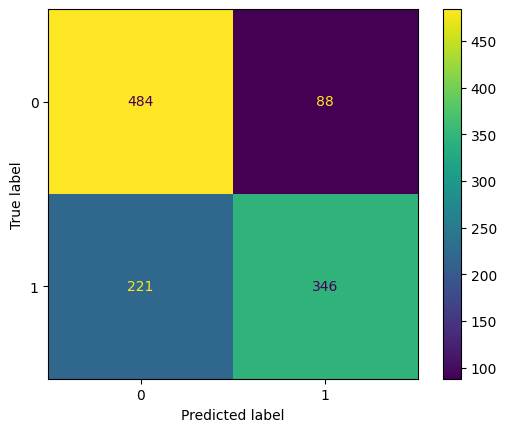

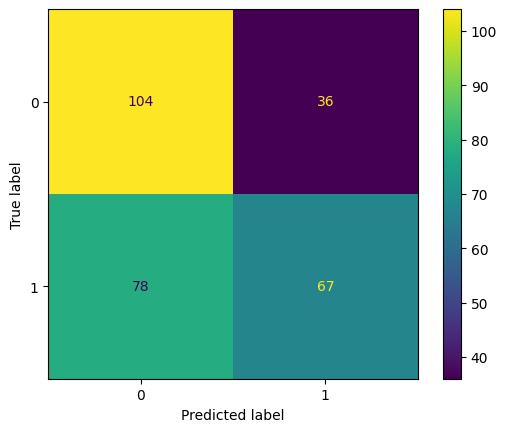

In [36]:
ConfusionMatrixDisplay.from_estimator(models[3], x_balanced_data, y_balanced_data)
ConfusionMatrixDisplay.from_estimator(models[3], x_balanced_test, y_balanced_test)

6. Conclusion
This is a better model compare to SVM model, but the prediction score is lower than the baseline model therefore accuracy is not high enough. 